# "US oil & gas production"
> "Accessing EIA with Jupyter"


In this post, we will plot a chart of (1) US oil production and (2) US gas production by accessing this data from EIA.

First, install the python wrapper for Energy Information Administration (EIA) API using your Command Prompt

pip install EIA_python

In [19]:
#import customary packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
#import EIA package
import eia

define key using your personal EIA API key <br>
key = eia.API("Peronal API KEY")

In [21]:
#hide_input
key = eia.API('fae9d0bd7f4172e57a1876b2e5802392')

In [39]:
#Let's try quering EIA with our key. EIA has unique series ID for a variety of data. 
#Browse series ID here: https://www.eia.gov/opendata/qb.php?category=371

#We'll first query for "U.S. Field Production of Crude Oil, Annual" with "PET.MCRFPUS2.A"
oil = key.data_by_series('PET.MCRFPUS2.A')

type(oil) #check type of data series we get back

dict

In [44]:
#key.data_by_series("series_ID") returns a dictionary
#We'll convert it into a pandas dataframe to enhance display and functionality

oildf = pd.DataFrame(oil)

#Observe US crude oil production over the past 10 year 
oil10 = oildf[-10:]

oil10

,"U.S. Field Production of Crude Oil, Annual (Thousand Barrels per Day)"
2010,5484
2011,5667
2012,6521
2013,7494
2014,8789
2015,9446
2016,8852
2017,9371
2018,10964
2019,12248


In [61]:
#Conver the production to million barrels per day (mmbpd) by dividing by 1000

oil10 = oil10/1000
oil10

,"U.S. Field Production of Crude Oil, Annual (Thousand Barrels per Day)"
2010,5.484
2011,5.667
2012,6.521
2013,7.494
2014,8.789
2015,9.446
2016,8.852
2017,9.371
2018,10.964
2019,12.248


In [59]:
#Now lets do the same for US natural gas production
#We'll query for "U.S. Dry Natural Gas Production, Annual" with "NG.N9070US2.A"

gas = key.data_by_series('NG.N9070US2.A')
gasdf = pd.DataFrame(gas)
gas10 = gasdf[-10:]

gas10


,"U.S. Dry Natural Gas Production, Annual (Million Cubic Feet)"
2010,21315507
2011,22901879
2012,24033266
2013,24205523
2014,25889605
2015,27065460
2016,26592115
2017,27340583
2018,30774274
2019,33967557


In [60]:
#Convert the production value to billion cubic feet per day (bcf/d) by dividing by (1000*365)

gas10 = gas10/(1000*365)

gas10

,"U.S. Dry Natural Gas Production, Annual (Million Cubic Feet)"
2010,58.398649
2011,62.744874
2012,65.844564
2013,66.316501
2014,70.930425
2015,74.151945
2016,72.855110
2017,74.905707
2018,84.313079
2019,93.061800


In [81]:
#Merge the two dataframes

prod = pd.concat([oil10, gas10], axis = 1)
prod.columns = ["oil", "gas"]
prod

,oil,gas
2010,5.484,58.398649
2011,5.667,62.744874
2012,6.521,65.844564
2013,7.494,66.316501
2014,8.789,70.930425
2015,9.446,74.151945
2016,8.852,72.855110
2017,9.371,74.905707
2018,10.964,84.313079
2019,12.248,93.061800


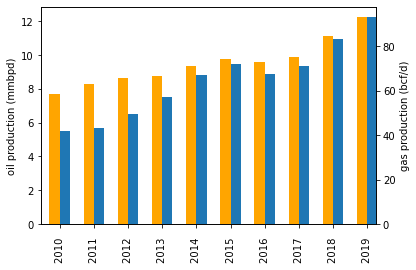

In [95]:
#Plot in bar chart

fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx()


prod.oil.plot(kind='bar', ax = ax, width = 0.3, position = 0)
prod.gas.plot(kind='bar', color = 'orange', ax = ax2, width = 0.3, position = 1)

ax.set_ylabel('oil production (mmbpd)')
ax2.set_ylabel('gas production (bcf/d)')

plt.show()